# An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale

The paper is available on [arXiv](https://arxiv.org/abs/2010.11929). In creating the interactive material for this notebook, we utilized the models checkpoints available on the [official repository](https://github.com/google-research/vision_transformer#vision-transformer-and-mlp-mixer-architectures).

------------------------------------------------------------------------

# Goals

The main purpose of this notebook is to:

-   develop the skills to critically analyze specific claims, both qualitative and quantitative, that are made in the research paper
-   discover how to use pretrained models available to verify claims that need a lot of computational resources
-   learn to identify the specific experiments they would need to run to validate each claim
-   learn to identify the data, code, and hyperparameters that are necessary to run each experiment, and to make reasonable choices when these are not provided

**To assess the reproducibility level of this paper, we need to answer some questions while experimenting:**

-   Is there code available for both training and inference stages?
-   Is the code written by the authors themselves, or by someone else? Are there multiple implementations available for comparison?
-   What framework and version was used by the authors? Are all the functions still available or do we need to make some modifications?
-   Did the authors compare their model to other models that are not implemented in the code? Are these models available elsewhere?
-   Are all the hyperparameters for all the experiments clearly specified? If not, how sensitive is each hyperparameter to the performance?
-   Were the initial values set randomly or deterministically?
-   Are the datasets used by the authors accessible? Are there any preprocessing steps or modifications done to the data?
-   Did we obtain the same results as reported in the original paper?

# Introduction

The paper *“An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale”* by Dosovitskiy et al. introduces a novel way of applying the [transformer architecture](https://arxiv.org/abs/1706.03762), which was originally designed for natural language processing, to computer vision tasks. Unlike previous works that combine or modify [convolutional neural networks (CNNs)](https://arxiv.org/abs/1511.08458) with transformers, the authors propose to use transformers directly on images, without any CNNs involved. They split an image into a sequence of patches, and feed their embeddings to a transformer encoder, which produces a feature vector for each patch. They use the feature vector of a special classification token as the image representation, and add a classification head on top of it. They name this model the [**Vision Transformer (ViT)**](https://arxiv.org/abs/2010.11929).

| 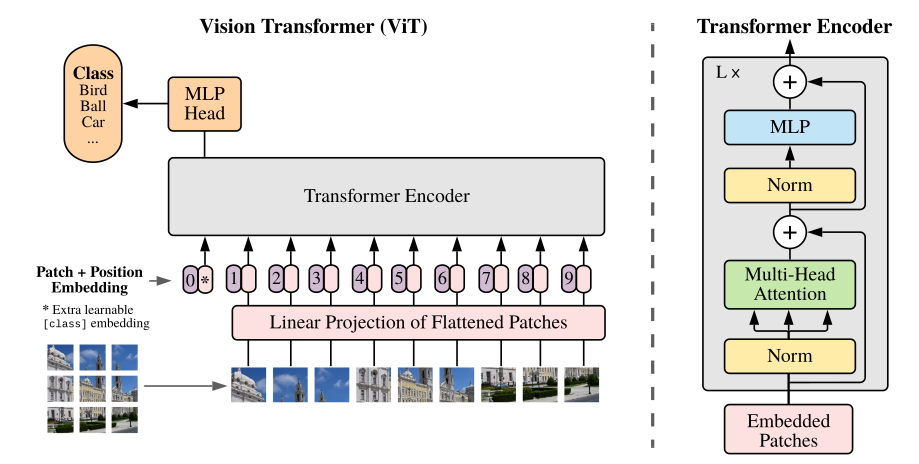                                                                                                                                                                                                                                                                                                                                                                                                           |
|:-----------------------------------------------------------------------|
| *The figure illustrates process of image classification using a transformer encoder. First, the image is divided into patches of equal size. Then, each patch is converted into a vector by a linear projection. Next, position embeddings are added to the patch vectors to preserve their spatial information. Finally, the sequence of patch vectors is fed into a standard transformer encoder to produce the image representation.* |

------------------------------------------------------------------------
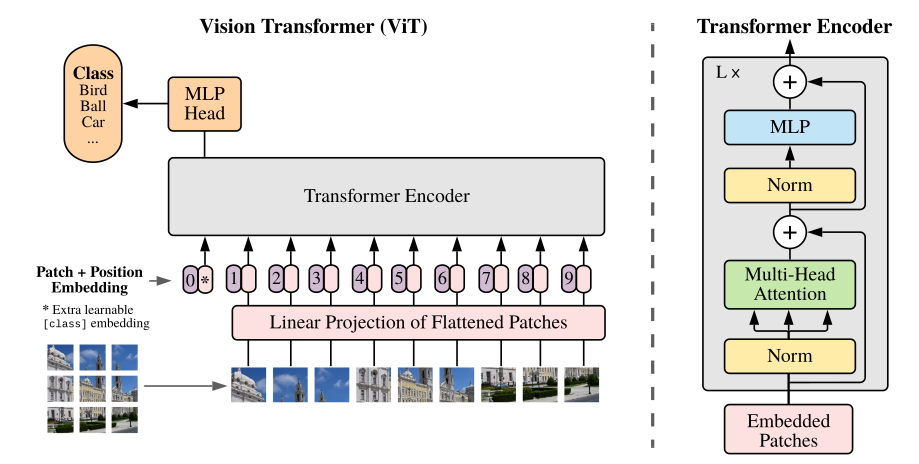

The authors show that ViT can achieve state-of-the-art results on image classification tasks, while requiring much less computational resources to train than CNNs. They also demonstrate that the key factor for the success of ViT is the scale of the pre-training dataset. When pre-trained on large-scale image datasets, such as ImageNet-21k or JFT-300M, and then fine-tuned on smaller downstream datasets, ViT attains significant improvements over previous models. The authors also conduct extensive experiments to analyze the properties and behaviors of ViT, such as its attention patterns, transferability, and robustness.

------------------------------------------------------------------------

In this paper we will reproduce the authors results to verify the claims made in the paper. Even though ViT requires less computation than CNNs, replicating the authors’ work will still cost a lot of computational resources, especially for pre-training on large-scale image datasets. Therefore, it will be better to actually use the pre-trained models available and fine-tune them in order to test the authors’ claims. The authors have released their pre-trained models and code on [GitHub](https://github.com/google-research/vision_transformer#vision-transformer-and-mlp-mixer-architectures), which can be easily adapted to different image classification tasks. By using the pre-trained models, one can save time and resources, and also benefit from the generalization and robustness of ViT. The table below shows the required resources to train each model used in the paper. The values of TPUv3-core-days indicate how many days it would take to pre-train each model on a single TPUv3 core, which is a specialized hardware accelerator for deep learning.

|      Model      | Paper-JFT (ViT-H/14) | Paper-JFT. (ViT-L/16) | Paper-I21k (ViT-L/16) | BiT-L (ResNet152x4) | Noisy Student (EfficientNet-L2) |
|:--:|:-----------:|:-----------:|:-----------:|:----------:|:-----------------:|
| TPUv3-core-days |         2.5k         |         0.68k         |         0.23k         |        9.9k         |              12.3k              |

------------------------------------------------------------------------

# Primary Claims

The paper assesses the performance of the **ResNet**, **ViT** and **hybrid** models on various image classification tasks, and makes some claims based on the assessment. In this section, we present these claims and propose a way to test them using the pre-trained models that the authors have provided.The table below shows the different variants of the models that the authors use. The authors also use a notation to refer to the models, such as *ViT-L/16*, which means the “Large” variant with an input patch size of 16 × 16. They also use an improved ResNet as the baseline model and refer to it as [*“ResNet (BiT)”*](https://arxiv.org/abs/1912.11370) which has published models on this [repo](https://github.com/google-research/big_transfer).

|   Model   | Layers | Hidden size D | MLP size | Heads | Params |
|:---------:|:------:|:-------------:|:--------:|:-----:|:------:|
| ViT-Base  |   12   |      768      |   3072   |  12   |  86M   |
| ViT-Large |   24   |     1024      |   4096   |  16   |  307M  |
| ViT-Huge  |   32   |     1280      |   5120   |  16   |  632M  |

------------------------------------------------------------------------

## Claim 1: Vision Transformer outperforms state of the art CNNs on various classification tasks after pretraining on large datasets

This claim suggests that the vision transformer can leverage more knowledge from large datasets than CNN models during pretraining and transfer this knowledge to the fine tuning task. This implies that the vision transformer can achieve higher or comparable accuracies to the state of the art models on different classification tasks.

The authors back up their claim by pretraining three variants of the vision transformer and comparing their results as shown in the table below. However, the pretraining is done on the JFT dataset, which is a private dataset only accessible to Google. Moreover, the models released by the authors do not include the models pretrained on the JFT dataset. (BiT-L is a ResNet152x4 model)

|      Model      | ImageNet | ImageNet ReaL | CIFAR-10 | CIFAR-100 | Oxford-IIIT Pets | Oxford Flowers-102 | VTAB (19 tasks) |
|:---------:|:----:|:--------:|:----:|:-----:|:---------:|:-----------:|:---------:|
| ViT-H/14 (JFT)  |  88.55   |     90.72     |  99.50   |   94.55   |      97.56       |       99.68        |      77.63      |
| ViT-L/16 (JFT)  |  87.76   |     90.54     |  99.42   |   93.90   |      97.32       |       99.74        |      76.28      |
| ViT-L/16 (I21k) |  85.30   |     88.62     |  99.15   |   93.25   |      94.67       |       99.61        |      72.72      |
|   BiT-L (JFT)   |  87.54   |     90.54     |  99.37   |   93.51   |      96.62       |       99.63        |      76.29      |
|  Noisy Student  |   88.4   |     90.55     |    \-    |    \-     |        \-        |         \-         |       \-        |

The following figure shows the breakdown of the VTAB tasks: 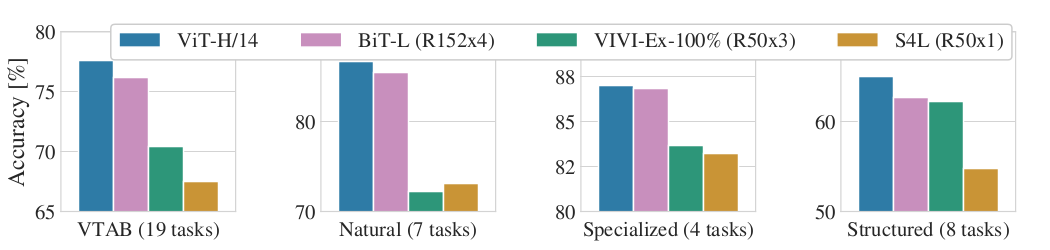

To test the qualitative aspect of this claim, we will use the pretrained models on the **ImageNet-21k** dataset that are publicly available. We will compare these models with the baseline model that is also pretrained on the same dataset and then fine tuned on the classification tasks as described in the paper.

However, the only quantitative aspect of the claim that we can verify is the one related to the ViT-L/16 (I21k) model, since the other models and the training data are not publicly available. Therefore, we cannot reproduce all the quantitative results of this experiment.

------------------------------------------------------------------------
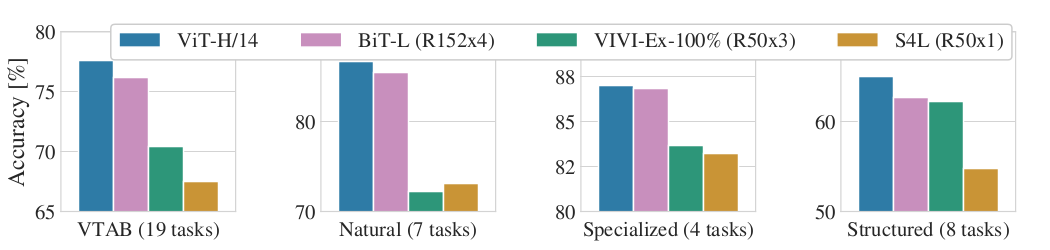

## Claim 2: The performance of the Vision Transformer on the classification task after fine tuning improves with the increase of the pretraining dataset size

This claim suggests that the performance of the vision transformer is influenced by the size of the dataset it was pretrained on. By pretraining on larger datasets, the model can perform better on the tasks it is finetuned for. This implies that the vision transformer has a better capacity to reuse the information learned previously on new datasets.

To support their claim, the authors pretrained both the ResNet models and the vision transformer on different sized datasets, which are **ImageNet**, **ImageNet-21k** and **JFT-300M**. The authors then fine tuned the models for classification of ImageNet dataset. The following figure illustrates the performance of the models pretrained on different datasets after fine tuning them.

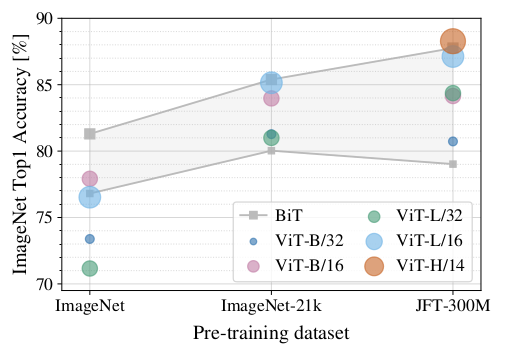

We will test the qualitative claim by fine tuning the pretrained models to classify images in the ImageNet dataset as the authors did and examine how the size of each pretraining dataset influences the final test accuracy. However, we cannot verify the results of the **JFT-300M** pretrained models as they are not publicly available.

The author further extend this experiment by fine tuning the vision transformer model on several other datasets.

Model pretrained on the ImageNet dataset:

|      Dataset       | ViT-B/16 | ViT-B/32 | ViT-L/16 | ViT-L/32 | ViT-H/14 |
|:------------------:|:--------:|:--------:|:--------:|:--------:|:--------:|
|      CIFAR-10      |  98.13   |  97.77   |  97.86   |  97.94   |    \-    |
|     CIFAR-100      |  87.13   |  86.31   |  86.35   |  87.07   |    \-    |
|      ImageNet      |  77.91   |  73.38   |  76.53   |  71.16   |    \-    |
|   ImageNet ReaL    |  83.57   |  79.56   |  82.19   |  77.83   |    \-    |
| Oxford Flowers-102 |  89.49   |  85.43   |  89.66   |  86.36   |    \-    |
|  Oxford-IIIT-Pets  |  93.81   |  92.04   |  93.64   |  91.35   |    \-    |

Model pretrained on the ImageNet-21k dataset:

|      Dataset       | ViT-B/16 | ViT-B/32 | ViT-L/16 | ViT-L/32 | ViT-H/14 |
|:------------------:|:--------:|:--------:|:--------:|:--------:|:--------:|
|      CIFAR-10      |  98.95   |  98.79   |  99.16   |  99.13   |  99.27   |
|     CIFAR-100      |  91.67   |  91.97   |  93.44   |  93.04   |  93.82   |
|      ImageNet      |  83.97   |  81.28   |  85.15   |  80.99   |  85.13   |
|   ImageNet ReaL    |  88.35   |  86.63   |  88.40   |  85.65   |  88.70   |
| Oxford Flowers-102 |  99.38   |  99.11   |  99.61   |  99.19   |  99.51   |
|  Oxford-IIIT-Pets  |  94.43   |  93.02   |  94.73   |  93.09   |  94.82   |

Model pretrained on the JFT-300M dataset:

|      Dataset       | ViT-B/16 | ViT-B/32 | ViT-L/16 | ViT-L/32 | ViT-H/14 |
|:------------------:|:--------:|:--------:|:--------:|:--------:|:--------:|
|      CIFAR-10      |  99.00   |  98.61   |  99.38   |  99.19   |  99.50   |
|     CIFAR-100      |  91.87   |  90.49   |  94.04   |  92.52   |  94.55   |
|      ImageNet      |  84.15   |  80.73   |  87.12   |  84.37   |  88.04   |
|   ImageNet ReaL    |  88.85   |  86.27   |  89.99   |  88.28   |  90.33   |
| Oxford Flowers-102 |  99.56   |  99.27   |  99.56   |  99.45   |  99.68   |
|  Oxford-IIIT-Pets  |  95.80   |  93.40   |  97.11   |  95.83   |  97.56   |

We can attempt to verify the quantitative claims for the **ImageNet** and **ImageNet-21k** models, but we cannot reproduce the experiment results for the **JFT-300M** dataset as the models and dataset are not publicly available.

------------------------------------------------------------------------
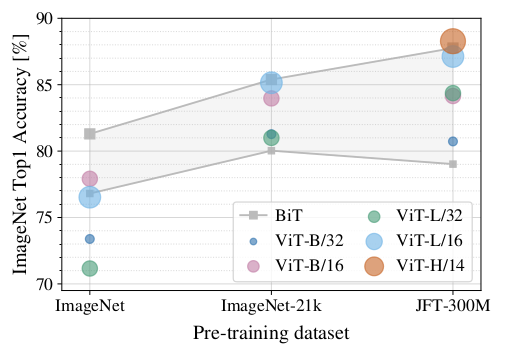

## Claim 3: The hybrid Vision Transformer can perform better than both baseline and Vision Transformer after fine tuning it to different classification task

------------------------------------------------------------------------

**Note: There are other claims about the computational improvement of the vision transformer model compared to the traditional CNNs that achieve similar results. We will not address any of these claims due to their high computational cost. Moreover, some of these results are not reproducible because of the unavailability of the JFT-300M dataset.**

------------------------------------------------------------------------

# Experiments

In this section, we will attempt to verify the qualitative and quantitative aspects of each claim. We will indicate which claims cannot be verified due to the lack of the material published by the authors. We will mainly use pretrained models published to verify these claims. Below is a table with the available models.

//////////////Table of available models/////////////////////

------------------------------------------------------------------------